# Imports

In [1]:
# File R/W
import os

# Additional Inbuilt Utilities
import itertools
import functools

# Regex
import re

# Array
import numpy as np

# Table
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Advanced Computations
import scipy as sc

# Statistics
import statsmodels.api as sm

# Neurophysiological Data Analysis
import mne
import mne_nirs # esp. for fNIRS

# Vistual Display
from pyvirtualdisplay import Display

# Custom Settings
import constants

# Custom Functions
import utils

# Modified MBLL
import mbll

# Custom Class
from nirs import NIRS

## Config

In [2]:
mne.set_log_level('WARNING')

In [3]:
# Set plotting backend for MNE
mne.viz.set_browser_backend('matplotlib') # qt, matplotlib
mne.viz.set_3d_backend('notebook') # pyvistaqt, notebook

# MAIN

In [4]:
nirs = NIRS().read(1, 1, 4)
savepoints = nirs.default_pipeline(ppf=0.1)

/home/pulkitgoyal56/fNIRS-attentional-load/nirs.py:404: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  self.raw.set_montage(mne.channels.read_custom_montage(self.montage_file_path, coord_frame='mri'))


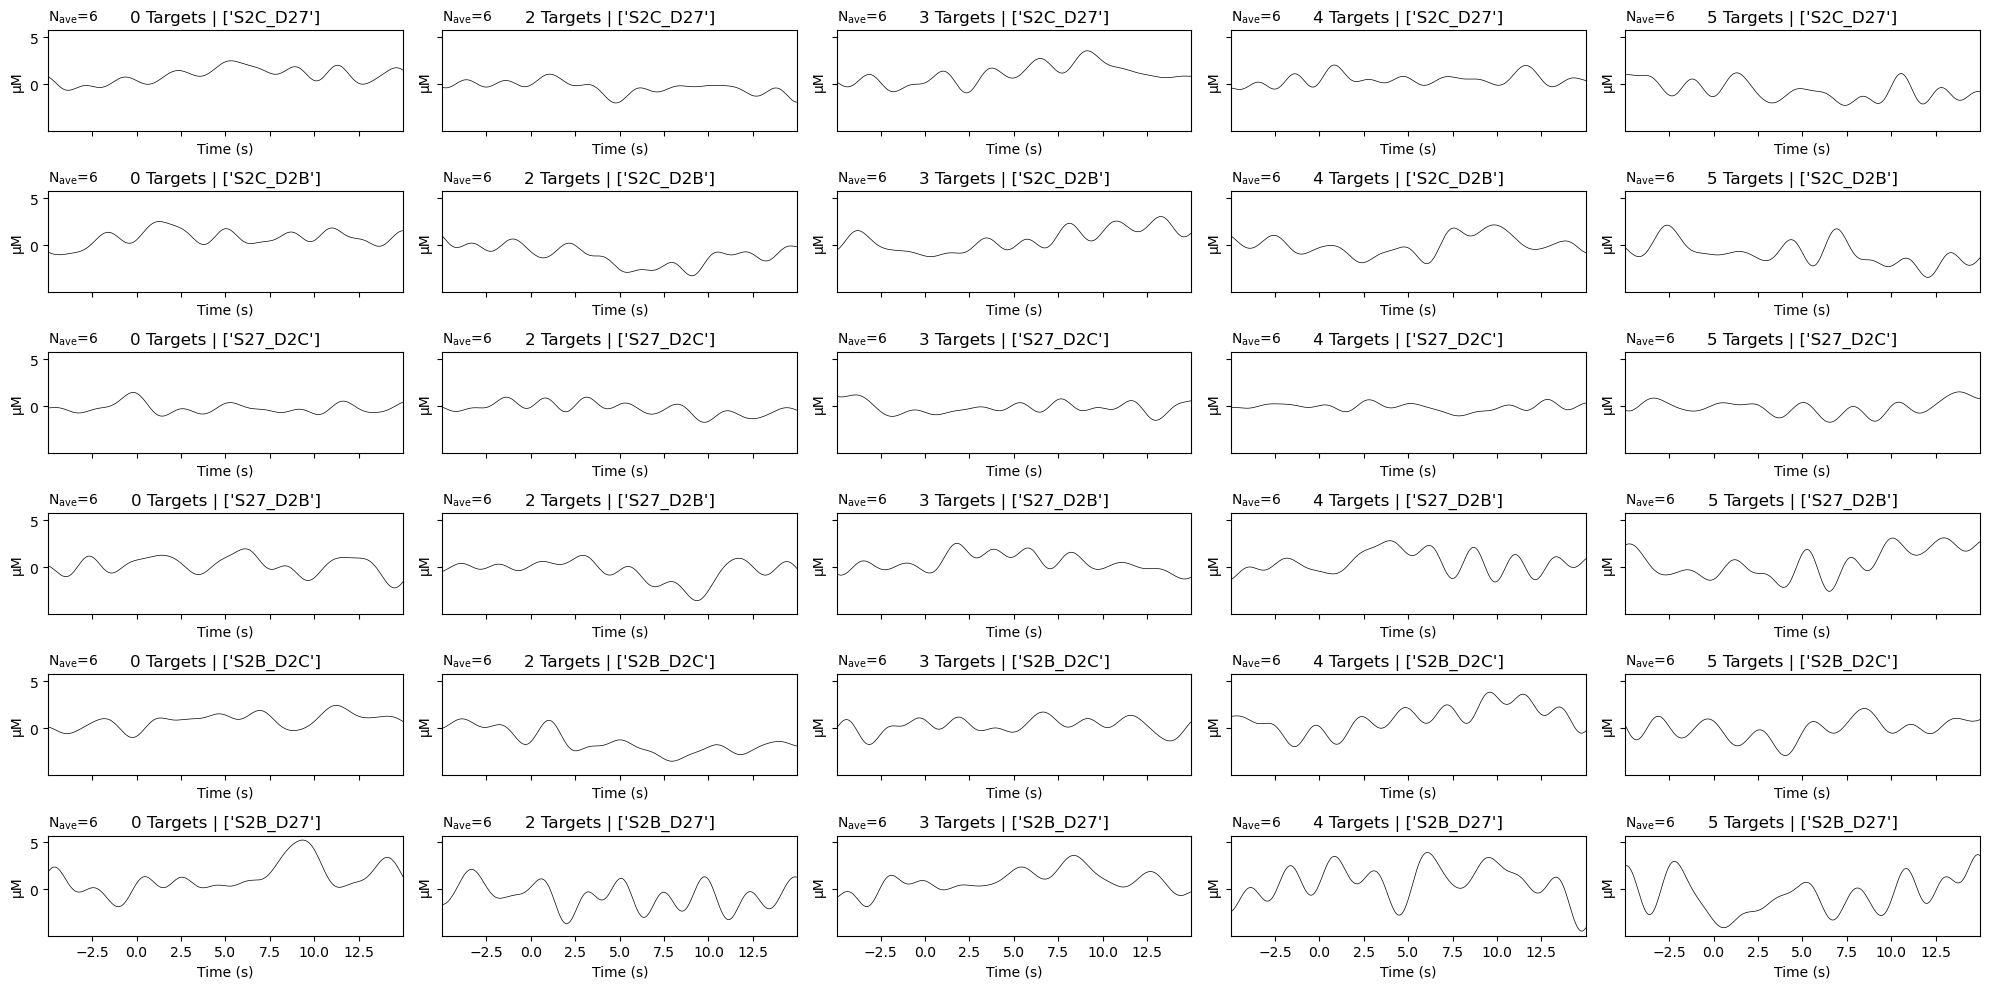

In [5]:
nirs.plot_average_waveform().tight_layout()

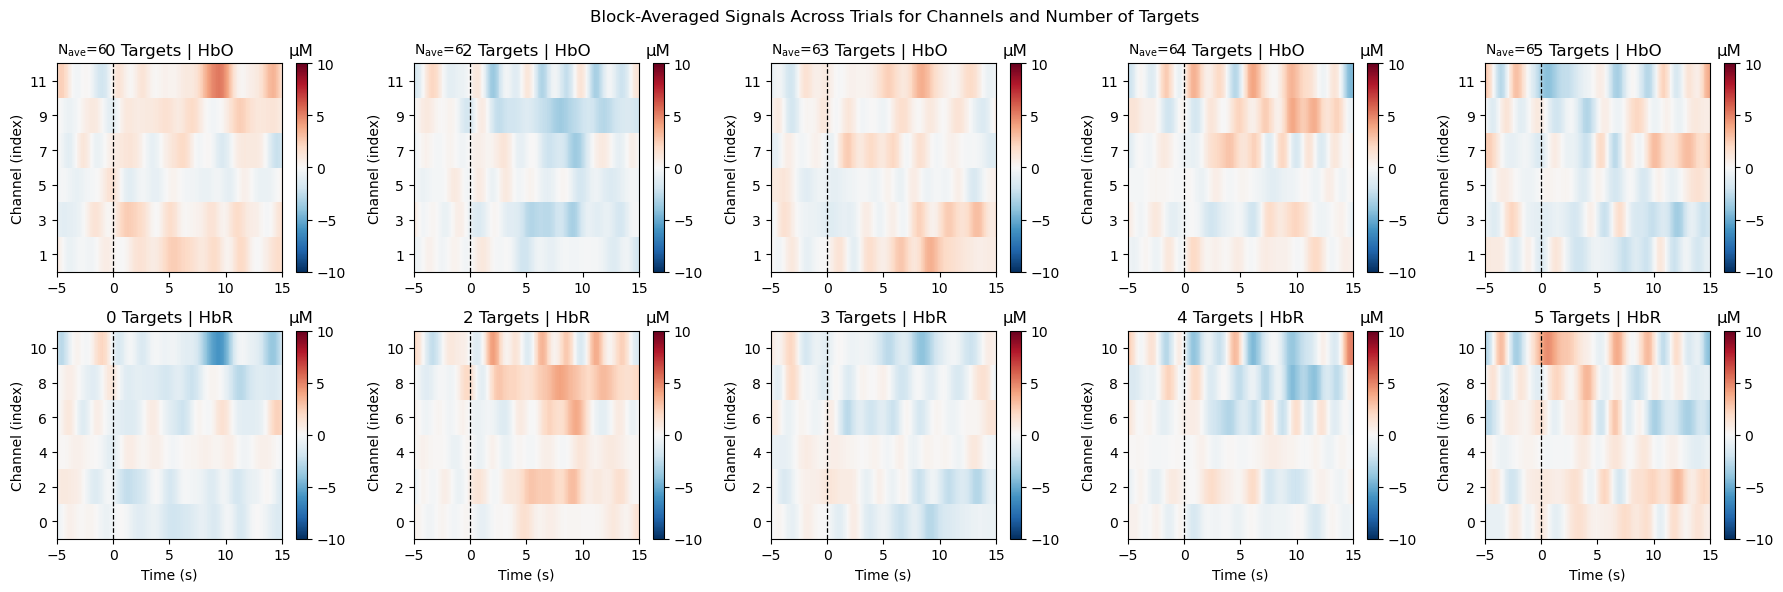

In [6]:
nirs.plot_average_heatmap().tight_layout()

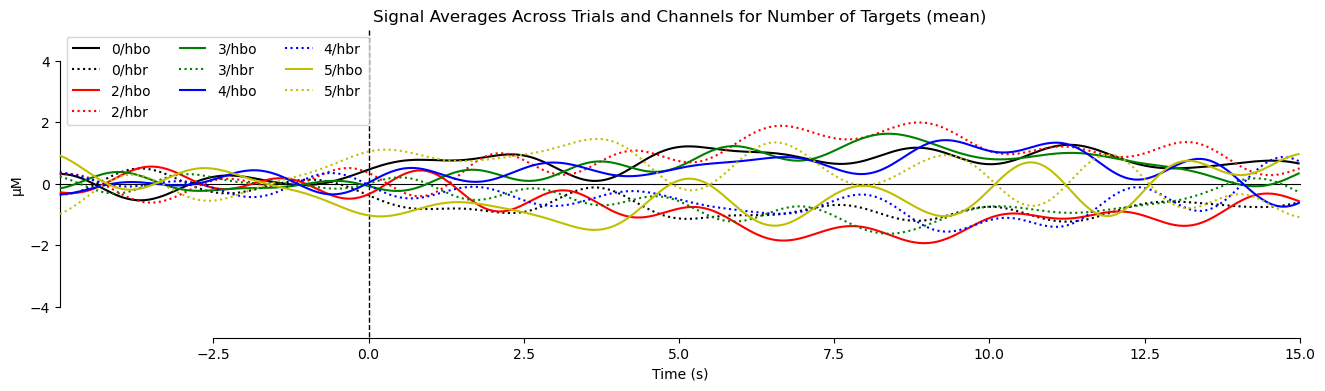

In [7]:
mne.viz.plot_compare_evokeds(nirs.evoked_dict, combine='mean', ci=0.95, axes=plt.figure(figsize=(16, 4)).add_subplot(111),
                             colors={'0': 'k', '2': 'r', '3':'g', '4':'b', '5':'y'},
                             linestyles={'hbo': '-',
                                         'hbr': ':'},
                             ylim={'hbo': [-5, 5]},
                             title='Signal Averages Across Trials and Channels for Number of Targets');

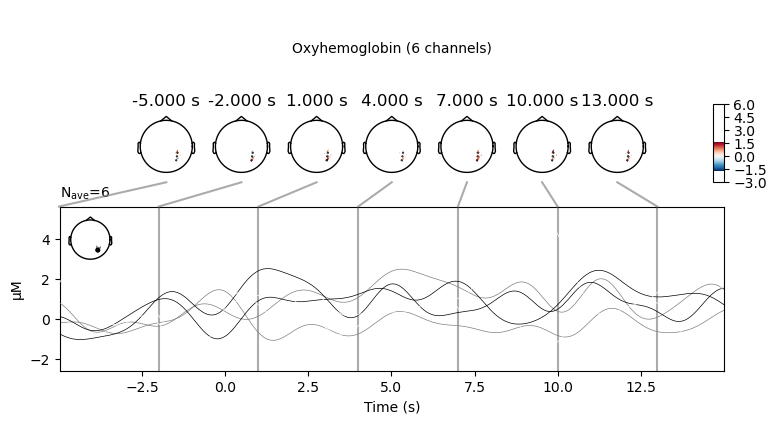

In [8]:
nirs.epochs['0'].average(picks='hbo').plot_joint(times=np.arange(nirs.T_EPOCH_START, nirs.T_EPOCH_END, 3), topomap_args={'extrapolate': 'local'});